Nous allons maintenant analyser les performances de notre portefeuille selon les théories du CAPM. Pour cela, nous allons calculer les Alpha et Bêta de chacun de nos portefeuilles issus des 2 stratégies : Long Only et Long Short.

Nous commençons donc par importer nos données : 

In [57]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm
from statsmodels import regression 
url = "C:/Users/louis/Documents/Projet Finance Quantitative/"

In [58]:
EONIA = pd.read_csv("C:/Users/louis/Downloads/data.csv",sep=";").dropna().reset_index(drop=True)
EONIA = EONIA.iloc[3:81,2].reset_index(drop=True)
EONIA = EONIA[::-1].reset_index(drop=True)
EONIA=EONIA.astype(float)
Sans_Fees = pd.read_csv(url+"Rdt_Finaux.csv")
SP5 = pd.read_csv("^GSPC.csv")
Sans_Fees["SP500"]= (SP5["Close"]/SP5["Open"]-1)*100
Sans_Fees["Eonia"] = EONIA
Sans_Fees

,Dates,Rdt_LO_cum,Rdt_LO,SP500_cum,Rdt_LS_cum,Rdt_LS,Eonia_cum,SP500,Eonia
0,2013-03-31,0.960797,-3.920348,1.035988,1.002397,0.239655,1.000670,1.475121,0.067
1,2013-04-30,1.001747,4.262130,1.054731,0.988513,-1.385021,1.001481,-3.823356,0.081
2,2013-05-31,1.044102,4.228076,1.076644,0.954176,-3.473640,1.002272,2.849451,0.079
3,2013-06-30,1.086812,4.090690,1.059864,0.950909,-0.342378,1.003134,5.796308,0.086
4,2013-07-31,1.080601,-0.571501,1.109869,0.973767,2.403847,1.004067,1.319977,0.093
...,...,...,...,...,...,...,...,...,...
73,2019-04-30,3.727131,10.080557,1.806769,1.752555,0.898638,0.876824,-4.806200,-0.367
74,2019-05-31,4.026801,8.040237,1.684208,1.810541,3.308621,0.873606,-0.243165,-0.367
75,2019-06-30,4.224601,4.912096,1.800647,1.829724,1.059537,0.870444,6.331664,-0.362
76,2019-07-31,4.715912,11.629745,1.806083,1.996157,9.096064,0.867249,0.422048,-0.367


Nous rappelons la formule suivante : 

<img src="https://www.robeco.com/images/2/b/d/2bdfde6c03e6c4b8cb3351f8b036eb16_capital-asset-pricing-model_tcm26-4902_800x0.jpg" width="200" height="100">

En théorie ! 

Cependant il y a toujours un décalage ou une erreure ! Cette erreure c'est l'alpha. Elle dépend des skills du gestionnaire lors de sa gestion active.

<img src="https://lh3.googleusercontent.com/proxy/M7ZQudwvWXE2R6DqP1NTwIRoE9f1ZqPvU_v8TeRcTJ_PF2KxaGNAxD7plWXFUNXhv-EayqUNC_ZQsHSkt-Z_pKxEh9BLXJqJQeO-tK8cqzSf02GKLL6ebQ" width="300" height="150">



In [59]:
def linreg(X,Y):
    
    X = sm.add_constant(X)
    model = regression.linear_model.OLS(Y,X).fit()
    
    X = X[:,1]
    return model.params[0], model.params[1]

alpha : 2.13852117899737
beta : -0.001735295755026147


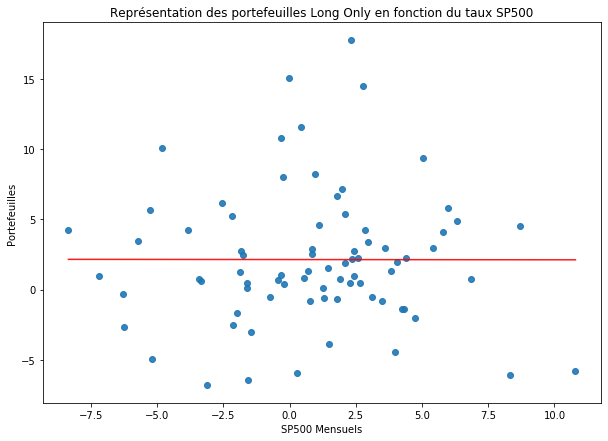

In [60]:
Y = Sans_Fees.Rdt_LO.values#/100
X = Sans_Fees.SP500.values#/100

alpha,beta = linreg(X,Y)
print("alpha : {}".format(alpha))
print("beta : {}".format(beta))

X2 = np.linspace(X.min(),X.max(),100)
Y_hat = X2 * beta + alpha

plt.figure(figsize = (10,7))
plt.scatter(X,Y, alpha=0.9)
plt.xlabel("SP500 Mensuels")
plt.ylabel("Portefeuilles")
plt.title("Représentation des portefeuilles Long Only en fonction du taux SP500")
plt.plot(X2,Y_hat,"r",alpha=0.9)
plt.show()

alpha : 0.5391319522634838
beta : -3.659331265562318


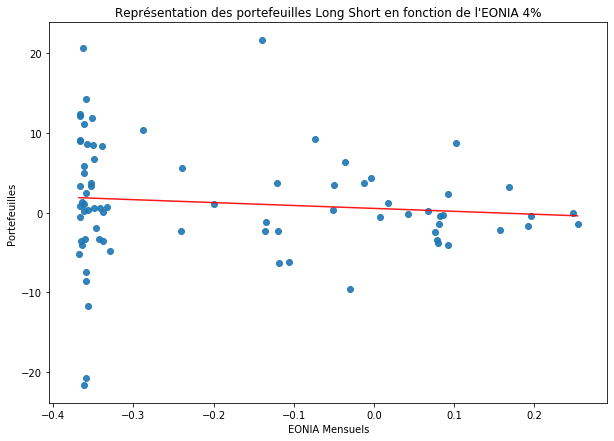

In [114]:
Y = Sans_Fees.Rdt_LS.values#/100
X = Sans_Fees.Eonia.values#/100

alpha,beta = linreg(X,Y)
print("alpha : {}".format(alpha))
print("beta : {}".format(beta))

X2 = np.linspace(X.min(),X.max(),100)
Y_hat = X2 * beta + alpha

plt.figure(figsize = (10,7))
plt.scatter(X,Y, alpha=0.9)
plt.xlabel("EONIA Mensuels")
plt.ylabel("Portefeuilles")
#plt.xlim(-0.0040,0.0035)
plt.title("Représentation des portefeuilles Long Short en fonction de l'EONIA 4%")
plt.plot(X2,Y_hat,"r",alpha=0.9)
plt.show()

Text(0.5, 1.0, 'Variation des Bêta')

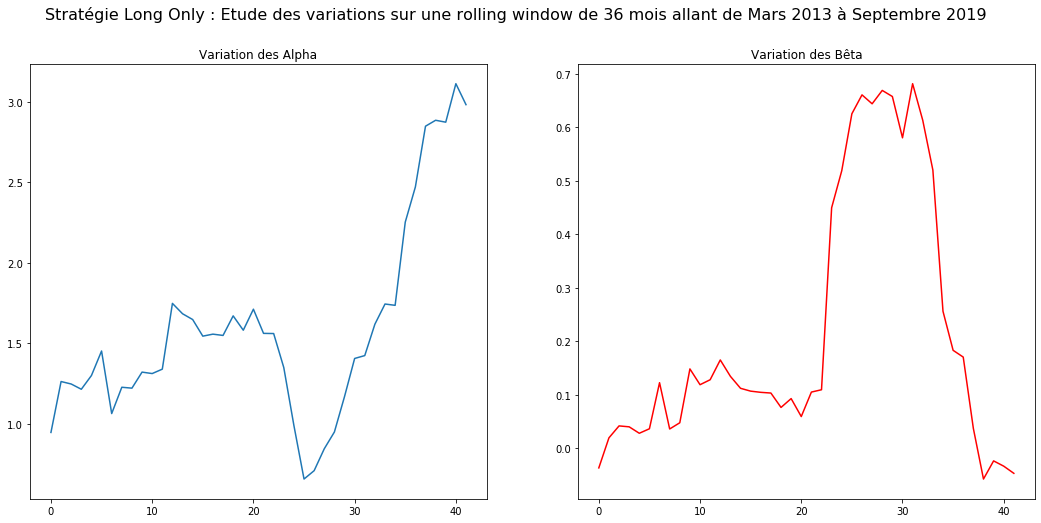

In [115]:
période = []
alpha_période = []
beta_période = []
for i in np.arange(0,42,1):
    temp = Sans_Fees.loc[i:36+i,:]
    Y = temp.Rdt_LO.values#/100
    X = temp.SP500.values#/100
    alpha,beta = linreg(X,Y)
    période.append(i)
    alpha_période.append(alpha)
    beta_période.append(beta)
data = pd.DataFrame(list(zip(période,alpha_période,beta_période)),columns=["Période","Alpha","Bêta"])
data["Période"] = data["Période"].astype(int)
fig, ax0 = plt.subplots(figsize=(18,8))
fig.suptitle('Stratégie Long Only : Etude des variations sur une rolling window de 36 mois allant de Mars 2013 à Septembre 2019', fontsize=16)
ax0 = plt.subplot(121)
ax0.plot(data["Période"],data["Alpha"])
ax0.set_title("Variation des Alpha")
ax1 = plt.subplot(122)
ax1.plot(data["Période"],data["Bêta"],color="red")
ax1.set_title("Variation des Bêta")

Text(0.5, 1.0, 'Variation des Bêta')

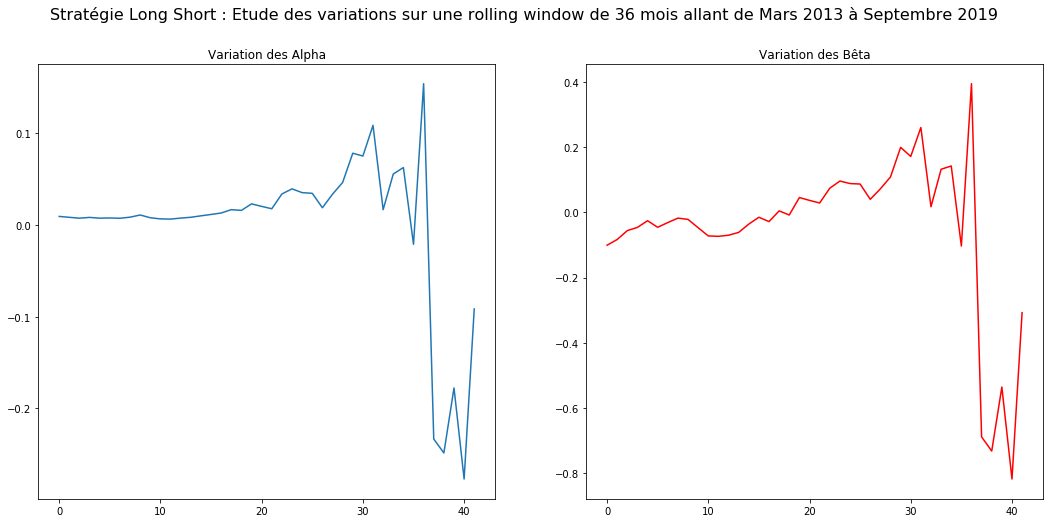

In [116]:
période = []
alpha_période = []
beta_période = []
for i in np.arange(0,42,1):
    temp = Sans_Fees.loc[i:36+i,:]
    Y = temp.Rdt_LS.values/100
    X = temp.Eonia.values#/100
    alpha,beta = linreg(X,Y)
    période.append(i)
    alpha_période.append(alpha)
    beta_période.append(beta)
data = pd.DataFrame(list(zip(période,alpha_période,beta_période)),columns=["Période","Alpha","Bêta"])
data["Période"] = data["Période"].astype(int)
fig, ax0 = plt.subplots(figsize=(18,8))
fig.suptitle('Stratégie Long Short : Etude des variations sur une rolling window de 36 mois allant de Mars 2013 à Septembre 2019', fontsize=16)
ax0 = plt.subplot(121)
ax0.plot(data["Période"],data["Alpha"])
ax0.set_title("Variation des Alpha")
ax1 = plt.subplot(122)
ax1.plot(data["Période"],data["Bêta"],color="red")
ax1.set_title("Variation des Bêta")